*Peio BERRECOCHEA et Baptiste CULERIER, Année Universitaire 2022-2023*

# **Assimilation de données Homework B**




## **I - How will the bore propagate?**


### **1) Code initial**
La première partie traitera le lancement du code par défaut et sa description. Le code est le suivant :

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
  
def inifig(xdim=7.5,ydim=5):
    # Standard figure initialization with grids
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)            

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Linearized observation operator
    cGprime=q/(x-hL)**2
    return cGprime

    
def Jb_cost(x):
    # Background part of the cost function 
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    # Observation part of the cost function 
    return (yo-cG_nol(x))**2/(2*sigr**2)

def J_cost(x):
    # Cost function
    return Jb_cost(x)+Jr_cost(x)

def Jrinc_cost(x):
    # Observation part of the incremental cost function 
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    # Incremental cost function
    return Jb_cost(x)+Jrinc_cost(x)


Et la partie donnant les résultats est :

sigb= 1 sigr= 10
======= Experiment number 0 =======


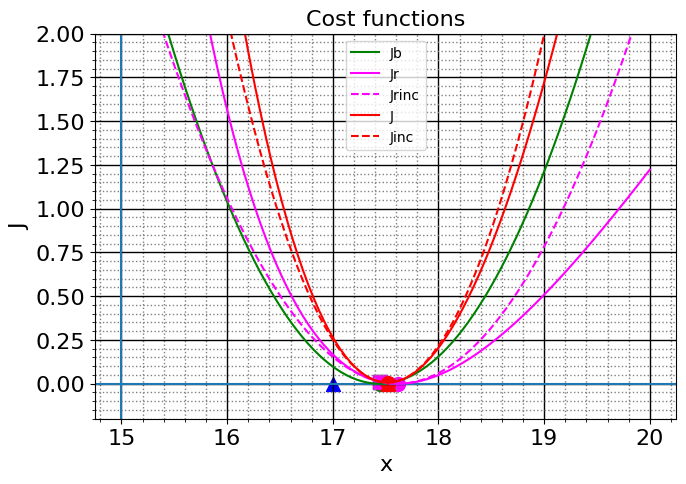

======= Experiment number 1 =======


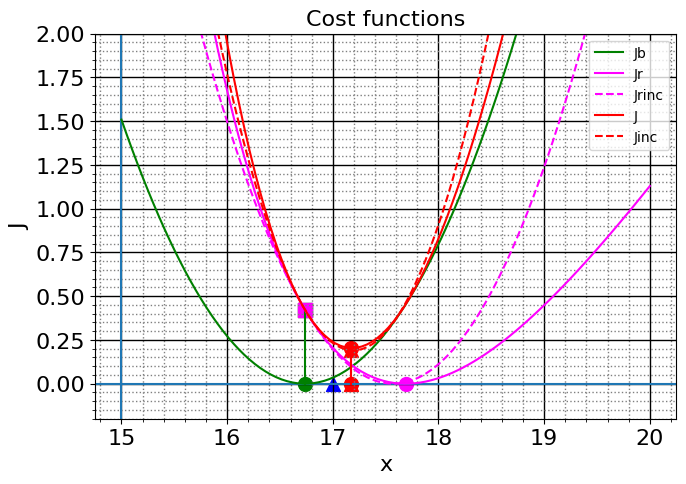

======= Experiment number 2 =======


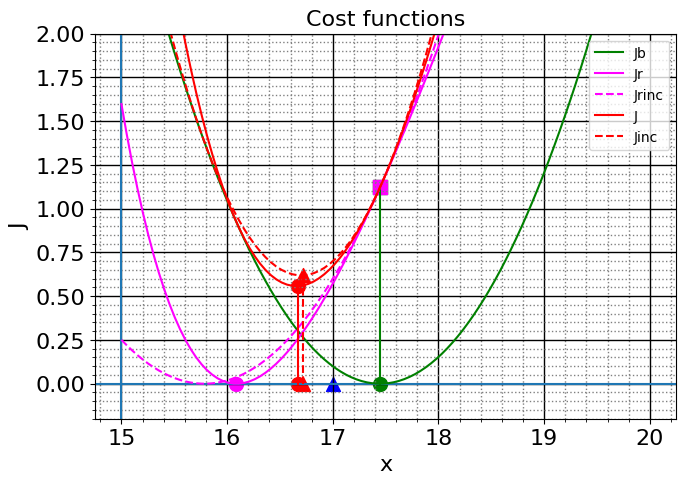

======= Experiment number 3 =======


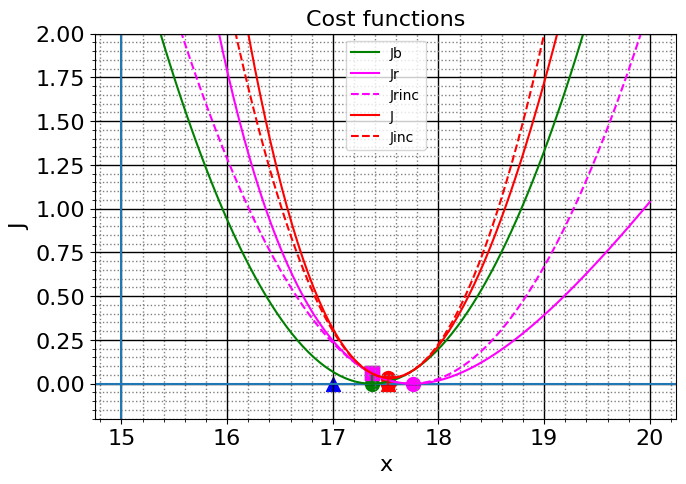

======= Experiment number 4 =======


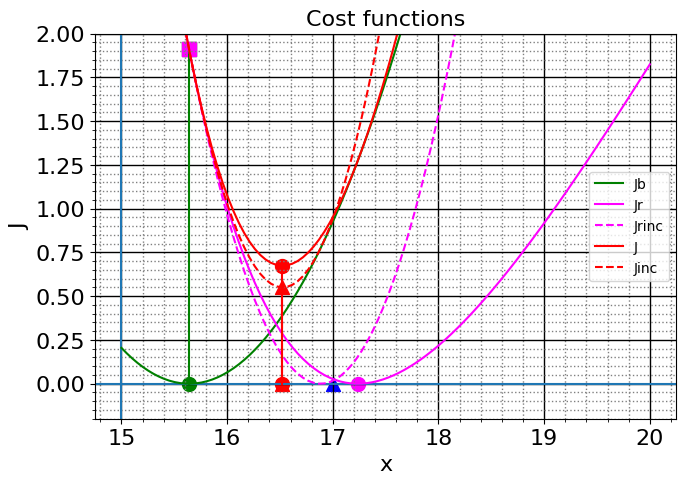

Close all figures to stop the program


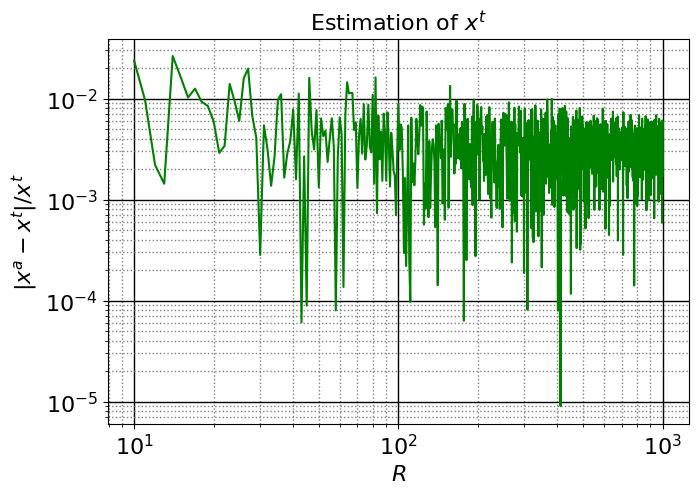

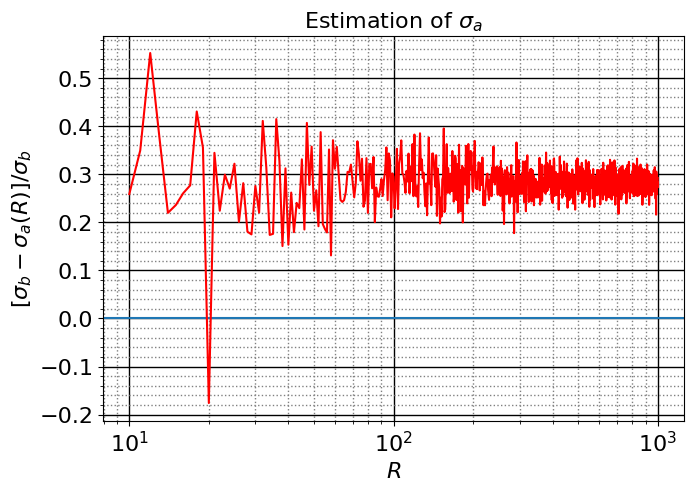

In [4]:
# Parameters to change
sigb=1; # Standard deviation of the background hR (cm)
sigr=10; # Standard deviation of the obseveration W (cm/s) 
ext=".png" # Figure format ".png" or ".pdf"
print('sigb=',sigb,'sigr=',sigr)

# Parameters for the plot of the cost functions
show_cost=True # Show the cost functions
Rcost=5 # Number of experiments for graphics
xmin, xmax=15, 20; # Min and Max of the plot for x
ymin, ymax=-.2, 2 # Min and Max of the plot for J

# Parameters for the plot the scores
show_analysis=True # Show the estimation of x^t and sigma_a
Rmax=1000 # Number of experiments the estimation

# Other parameters with no interest in changing
q=500 ; # Lineic discharge flux before experiment (cm^2/s))
hL= 10 # Water depth before experiment (cm)
xt=17;  # True state (cm)

# Derived parameters
yt=cG_nol(xt) # True observations

# Plotting the cost functions
if show_cost:
    x=np.linspace(xmin,xmax,100)
    for r in range(Rcost):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig()
        plt.title("Cost functions",fontsize=16)
        plt.axvline(xmin); plt.axhline(0)  
        plt.xlabel("x",fontsize=16); plt.ylabel("J",fontsize=16)
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green',label='Jb')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta',label='Jr')
        xo=hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed',label='Jrinc')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red',label='J')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red',label='Jinc')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        plt.ylim(ymin,ymax) 
        print('======= Experiment number '+str(r)+' =======')
      
        plt.savefig('cost'+str(r)+ext)
        plt.legend()
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if show_analysis:
    Rtab=[]; scormean=[]; scorsig=[] 
    
    for R in np.arange(10,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        # Table of used R 
        Rtab=np.append(Rtab,R)
        # Analysis versus true state
        E=np.sum(xa)/R # Average of the true state
        smean=np.abs(E-xt)/xt;
        scormean=np.append(scormean,smean)
        # Variance reduction
        sigaR=(np.sum((xa-xt)**2)/R)**.5;
        ssig=(sigb-sigaR)/sigb;
        scorsig=np.append(scorsig,ssig)
    # Plot of the estimation of the true state
    inifig()
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$|x^a-x^t|/x^t$',fontsize=16)
    plt.plot(Rtab,scormean,color='green')
    plt.xscale("log"); plt.yscale("log")
    plt.savefig('scormean'+ext)
    
    # Plot of the estimation of sigma_a
    inifig()
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$[\sigma_b-\sigma_a(R)]/\sigma_b$',fontsize=16)
    plt.plot(Rtab,scorsig,color='red')
    plt.xscale("log");
    plt.savefig('scorsig'+ext)
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()

Le programme affiche trois différents graphiques :

* les fonctions coûts que sont $J_r$, $J_b$, $J$, $J_{incr}$, $J_{rincr}$ pour plusieurs expériences
* une estimation de l'état réel $x^t$ pour un grand nombre d'expériences R
* L'écart-type de l'analyse $\sigma_a(R)$ selon R

### **2) Fonction de coût J**

Le programme réalise une même expérience R fois avec un vecteur de control $x$.


L'objectif est de minimiser la fonction de coût J définie par : $J(x)=J_b(x)+J_r(y)$ où $y=G(x)$, que le programme affiche.

Les fonctions $J_b(x)$ et $J_r(y)$ valent respectivement $\frac{(x-x_b)^2}{2σ_{b}^2}$ et $\frac{(y_o-G(x))^2}{2σ_{r}^2}$.


Enfin, le programme affiche les fonctions $J_{inc}$, $J_{rinc}$ qui sont par définition les fonctions incrémentales de $J$ et $J_{r}$ telles que :
* $J_{rinc}(x) = \frac{(y_o-G(x_b)-G'(x_b)(x-x_b))^2}{2σ_{r}^2}$
* $J_{inc} (x) = J_b(x) + J_{rinc}(x) $


### **3) Estimation de $x^t$**

Le score de moyenne ($scoremean$ dans le code python)  est calculé avec l'espérance de $x_a$ et la valeur de $x_t$ telle que :

$ scormean = \frac{E(x_a)-x_t}{σ_{b}} $

Ainsi, plus l'espérance de $x_a$ se rapproche de l'état réel $x^t$ et plus la courbe se rapproche de 0.



### **4) Estimation de $\sigma_a$**

Le score de variance ($scoresig$ dans le code python) est calculé avec la variance de $x_a$ et de $x_b$

$ scoresig = \frac{σ_{b}- σ_{a}}{σ_{b}} $





## **II - Modification des paramètres**

Il peut être intéressant de voir si la variation du nombre $N$ de réalisations a un impact conséquent sur la variation relative de $\sigma$ (la variance) définie par : $$\overline{\sigma}=\frac{\sigma_a-\sigma_b}{\sigma_b}$$ Pour ce faire il suffit de varier $\sigma_b$ ou $\sigma_r$ (aussi nommé $\sigma_a(R)$ dans les graphiques). Pour commencer on fixe $\sigma_b=1$ et on fait varier $\sigma_r$ de 1 à 10 avec un pas de 5.

On fixe sigb et on fait varier sigr
Rate of improvemennts rho= 0.061495
Pour sigma_b=1 et sigma_r= 1 on obtient


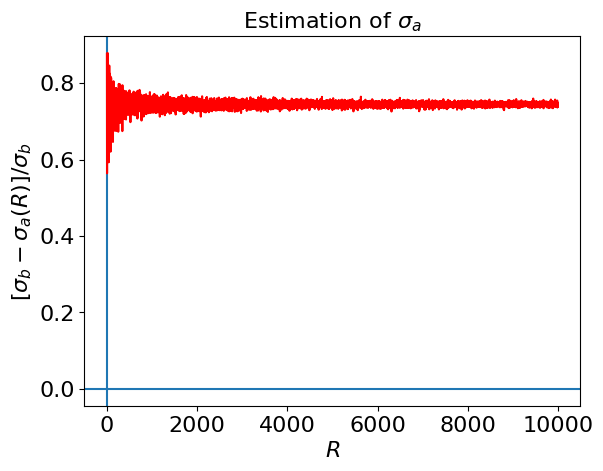

Pour sigma_b=1 et sigma_r= 5 on obtient


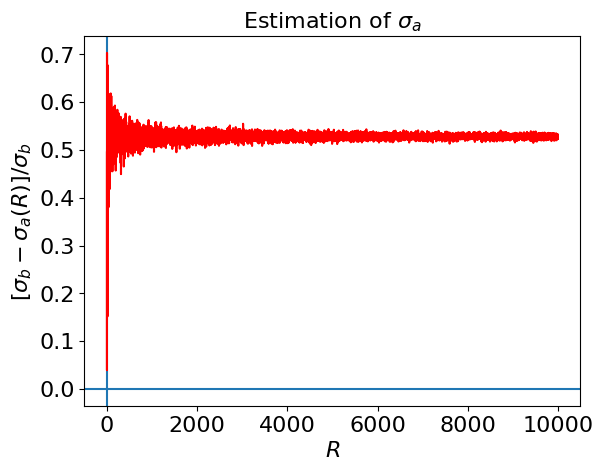

Pour sigma_b=1 et sigma_r= 10 on obtient


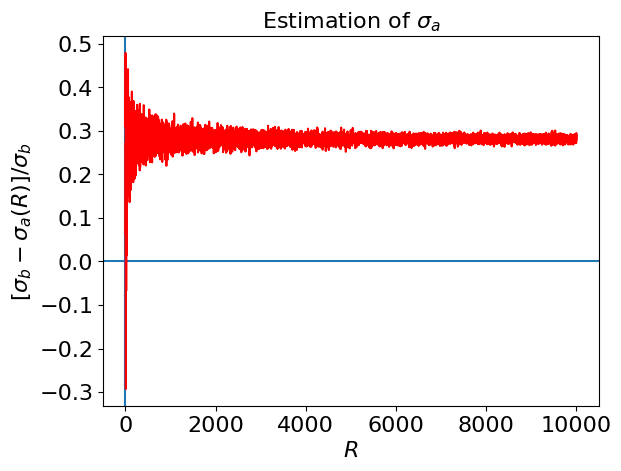

Cette fois en fixant sigma_r = 1  et en faisant varier sigma_b :
Pour sigma_r=1 et sigma_b= 1 on obtient


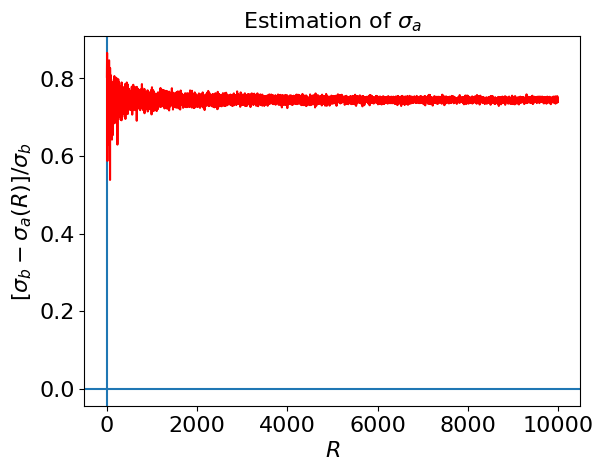

Pour sigma_r=1 et sigma_b= 5 on obtient


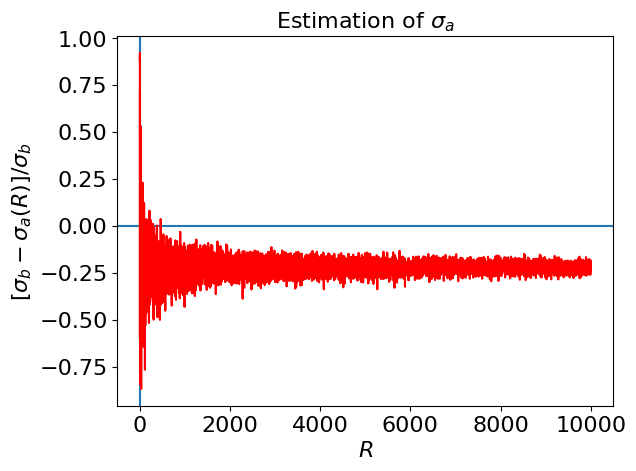

Pour sigma_r=1 et sigma_b= 10 on obtient


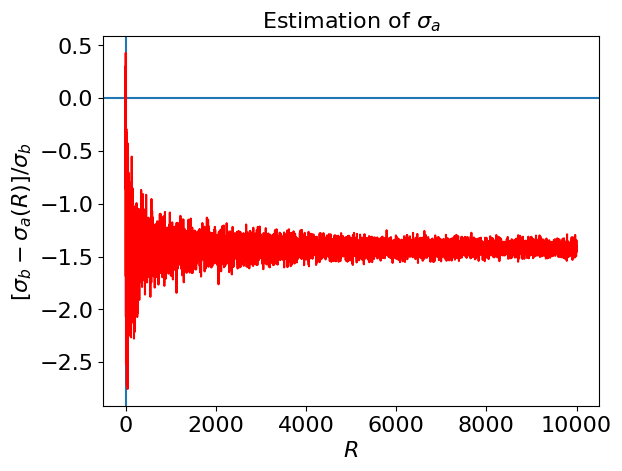

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 18:48:59 2019
@author: Olivier THUAL

Modified on Mon Jan 9 by : Peio BERRECOCHEA and Baptiste CULERIER
How will the bore propagate ?
Data assimilation with two informations linked by G

"""
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt
              

plt.close('all')

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)


def improve(Nc):
    # Counting if T2 improves the analysis
    count=0
    for i in range(Nc) :
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d     
        if abs(xb-xt) < abs(xa-xt) :
            count=count+1
    
    rho=count/Nc
    return rho    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=1; #On fait varier sigr ici
print('On fixe sigma_b et on fait varier sigma_r')
# Plotting the cost functions
if True :
    R=10
    xmin=15; xmax=19; 
    x=np.linspace(xmin,xmax,100)


# Counting the improvements
if True :
    
    rho=(improve(1000000))
    print('=================================')
    print('Rate of improvemennts rho=',rho) #à quelle fréquence l'assimilation de données permet d'améliorer la précision?
    print('=================================')


# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    
    i=0
    for sigr in (1,5,10):
        print('Pour sigma_b=1 et sigma_r=',sigr, 'on obtient')
        for R in np.arange(2,Rmax+1) :
        
            xb=xt+np.random.normal(0,sigb,R)
            yo=yt+np.random.normal(0,sigr,R)
            G=G_lin(xb)
            K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
            d=yo-cG_nol(xb)
            xa=xb+K*d
            E=np.sum(xa)/R
            V=np.sum((xa-xt)**2)/R
            sigaR=np.sqrt(V)
            smea=(E-xt)/sigb;
            ssig=(sigb-sigaR)/sigb;
            scormea=np.append(scormea,smea)
            scorsig=np.append(scorsig,ssig)
            
   
    # siga
        inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$[\sigma_b-\sigma_a(R)]/\sigma_b$')
        plt.plot(scorsig,color='red')
        plt.title('Estimation of $\sigma_a$',fontsize=16)
        plt.show()
        plt.close()
        scormea=[]
        scorsig=[]
        
    print('Cette fois en fixant sigma_r =',1,' et en faisant varier sigma_b :')
    sigr=1
    for sigb in (1,5,10):
        print('Pour sigma_r=1 et sigma_b=',sigb, 'on obtient')
        for R in np.arange(2,Rmax+1) :
        
            xb=xt+np.random.normal(0,sigb,R)
            yo=yt+np.random.normal(0,sigr,R)
            G=G_lin(xb)
            K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
            d=yo-cG_nol(xb)
            xa=xb+K*d
            E=np.sum(xa)/R
            V=np.sum((xa-xt)**2)/R
            sigaR=np.sqrt(V)
            smea=(E-xt)/sigb;
            ssig=(sigb-sigaR)/sigb;
            scormea=np.append(scormea,smea)
            scorsig=np.append(scorsig,ssig)
            
   
    # siga
        inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$[\sigma_b-\sigma_a(R)]/\sigma_b$')
        plt.plot(scorsig,color='red')
        plt.title('Estimation of $\sigma_a$',fontsize=16)
        plt.show()
        plt.close()
        scormea=[]
        scorsig=[]

    